In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter("ignore")

In [6]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True) 

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [10]:
df.shape

(29020, 18)

In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.duplicated().sum()

7661

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [17]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [18]:
df["required_car_parking_space"].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [19]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [20]:
df["arrival_year"].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [21]:
df["arrival_month"].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [22]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [23]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [24]:
df["no_of_previous_bookings_not_canceled"].value_counts()

no_of_previous_bookings_not_canceled
0     20711
1       180
2        89
3        65
4        54
5        47
6        29
8        20
7        18
9        16
10       14
11       11
12       10
14        8
15        7
19        6
13        6
21        5
18        5
22        5
20        4
16        4
24        3
17        3
23        3
25        3
48        2
44        2
28        2
27        2
29        2
57        1
42        1
53        1
58        1
52        1
45        1
35        1
49        1
33        1
26        1
50        1
56        1
55        1
30        1
40        1
36        1
47        1
38        1
43        1
46        1
34        1
31        1
51        1
Name: count, dtype: int64

In [25]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

### our data is imbalanced


In [26]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved','market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [28]:
len(cat_cols), len(num_cols)

(6, 12)

### DATA ANALYSIS

#### UNIVARIATE ANALYSIS

In [29]:
data=df.copy()
data.head()
data.shape

(21359, 18)

In [30]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = np.array([axes])
        
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f"Histgram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()

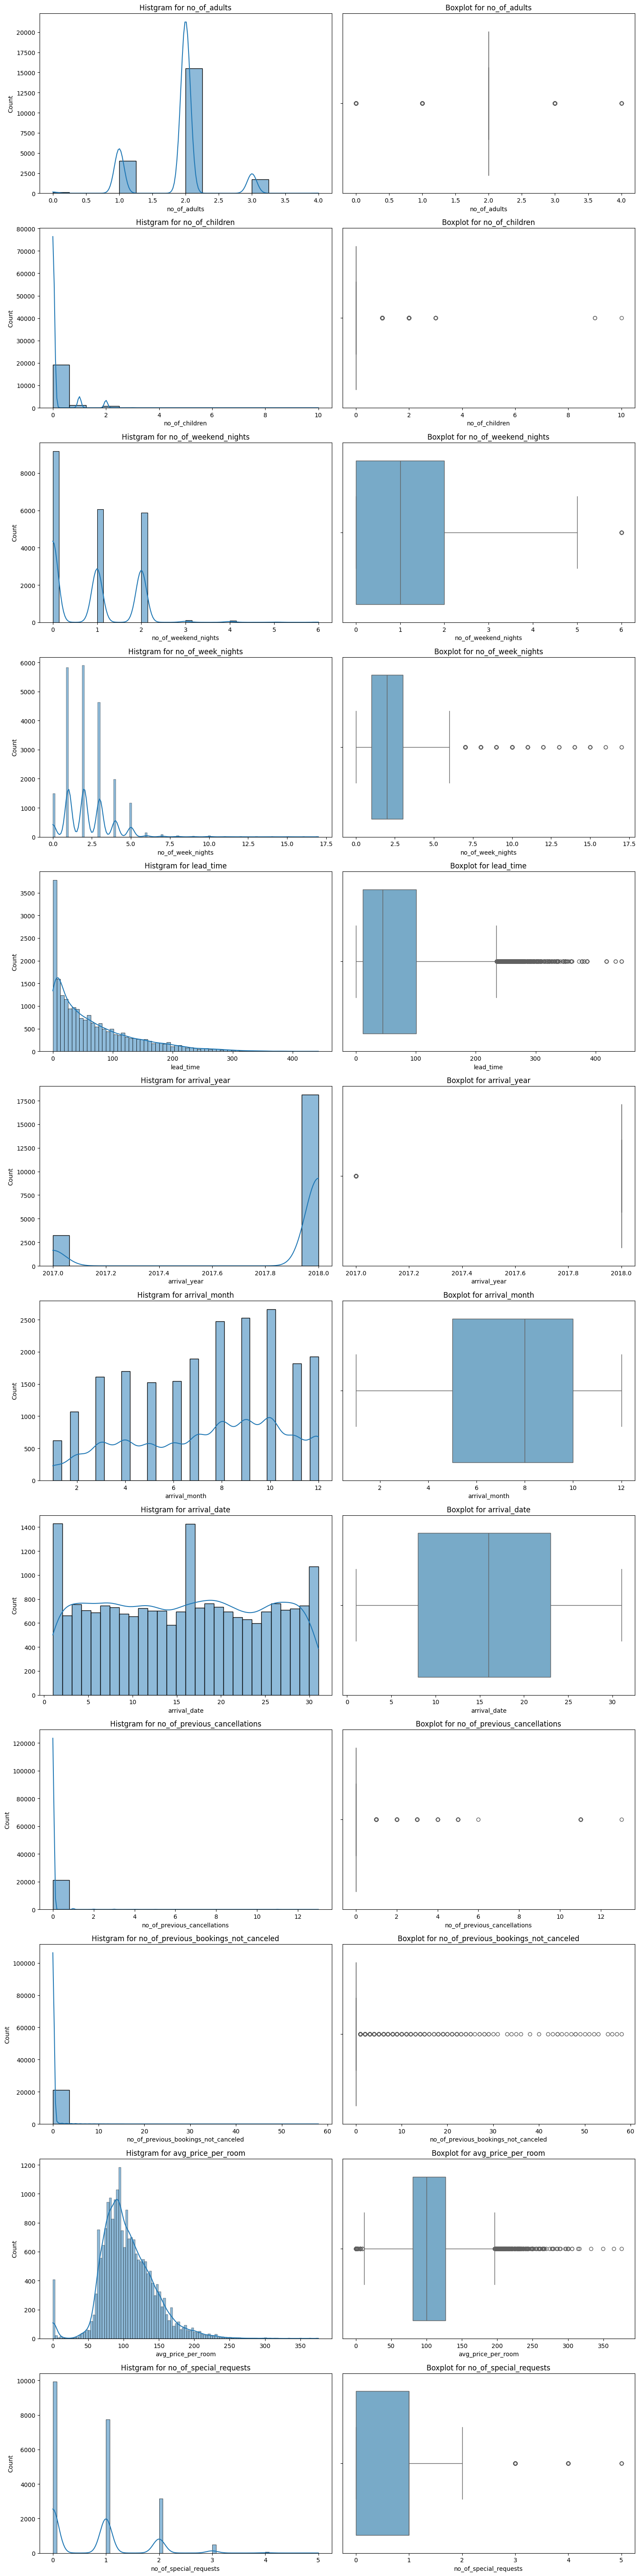

In [31]:
num_plot_dist(data, num_cols)

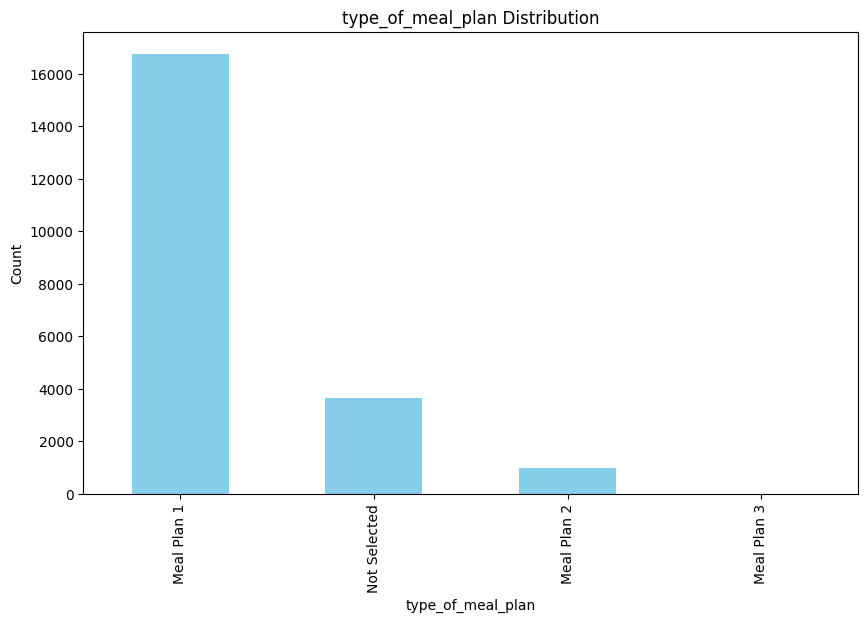

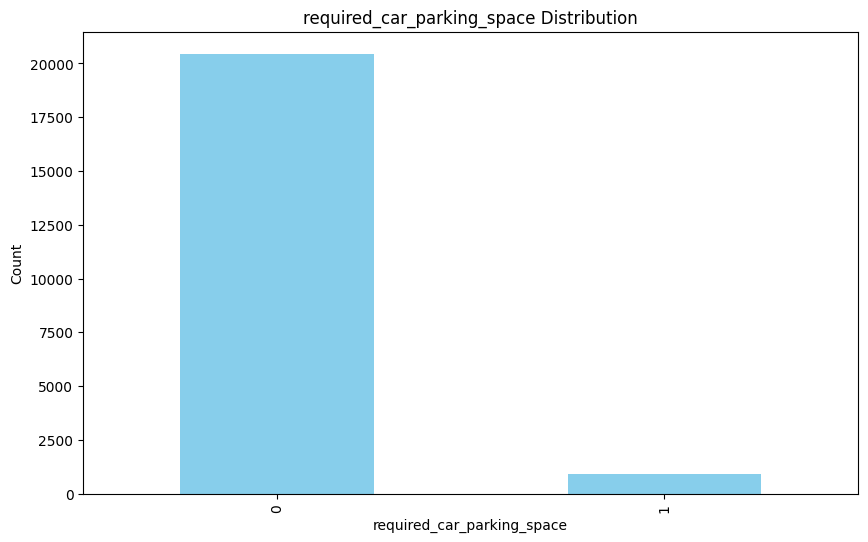

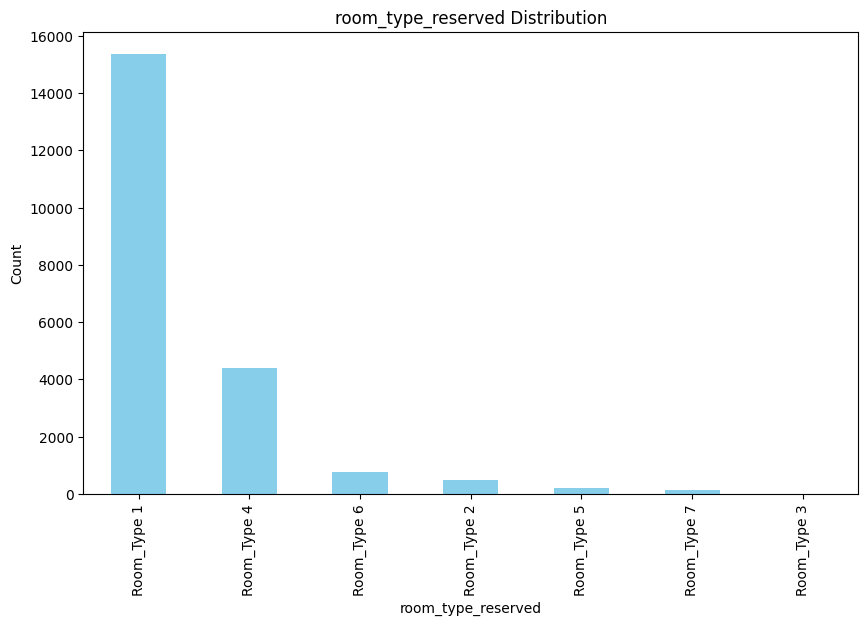

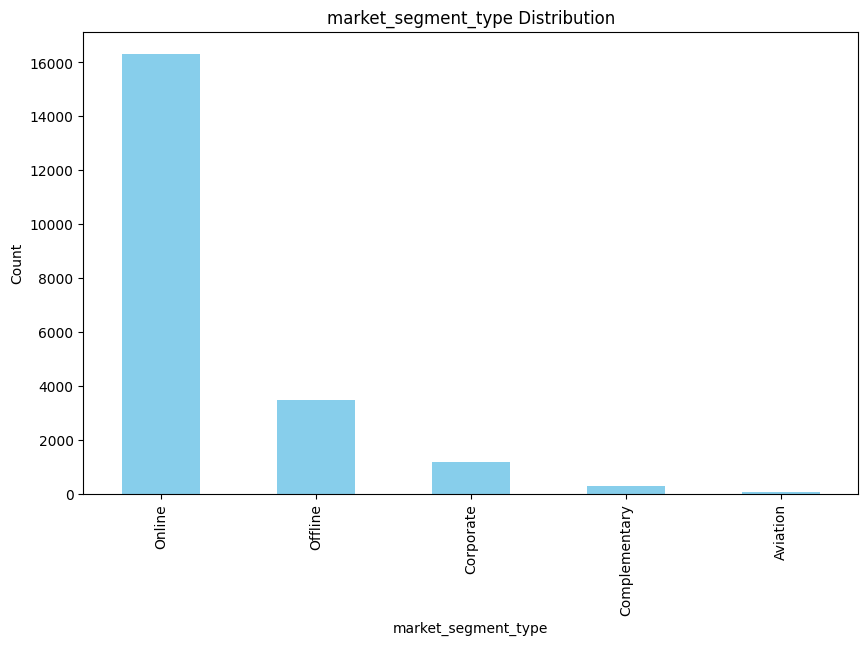

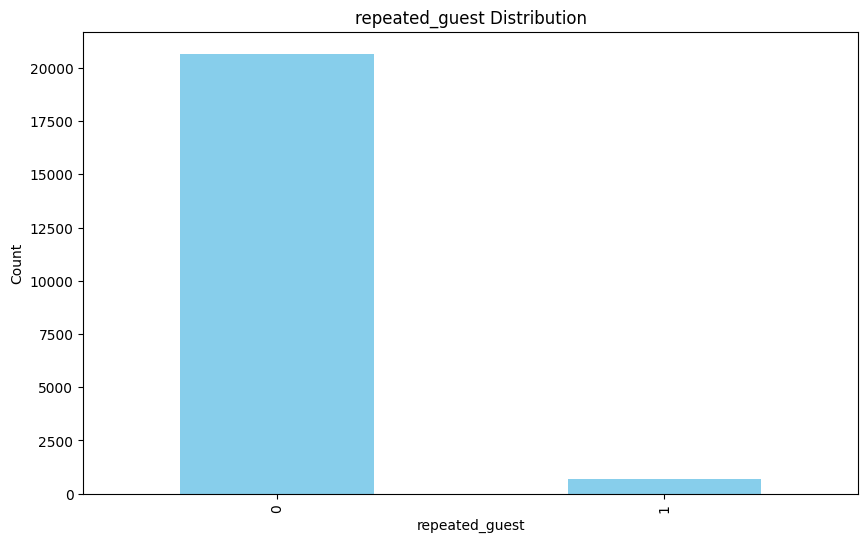

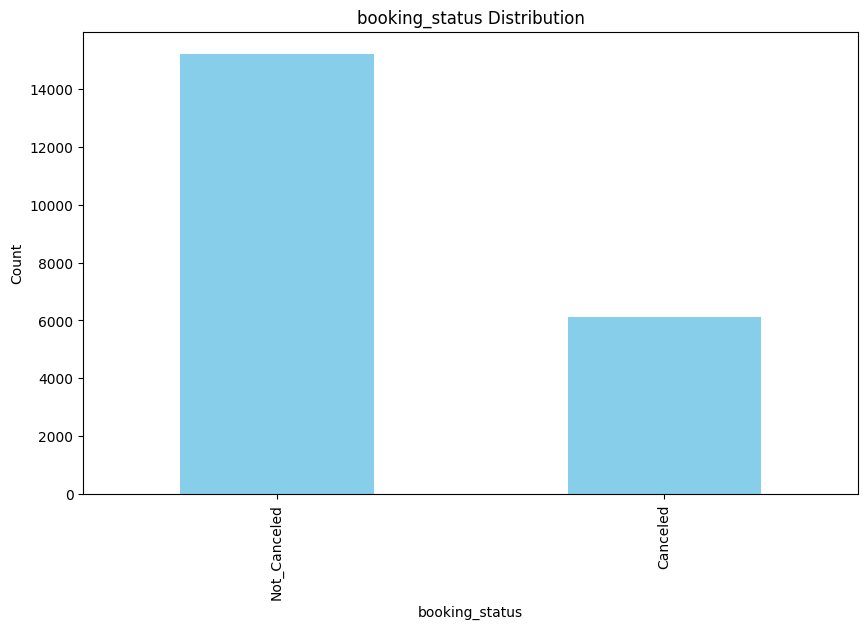

In [32]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### Bivariate analysis

In [33]:
def plot_bivariate_num(df, target, num_features):
      num_plots = len(num_features)
      num_rows = (num_plots+1)//2

      fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
      axes = axes.flatten() 
      for i, column in enumerate(num_features):
          sns.boxplot( x=target, y=column, ax=axes[i], data=df, palette='Blues')
          axes[i].set_title(f'{column} vs {target}')
      plt.tight_layout()
      plt.show()

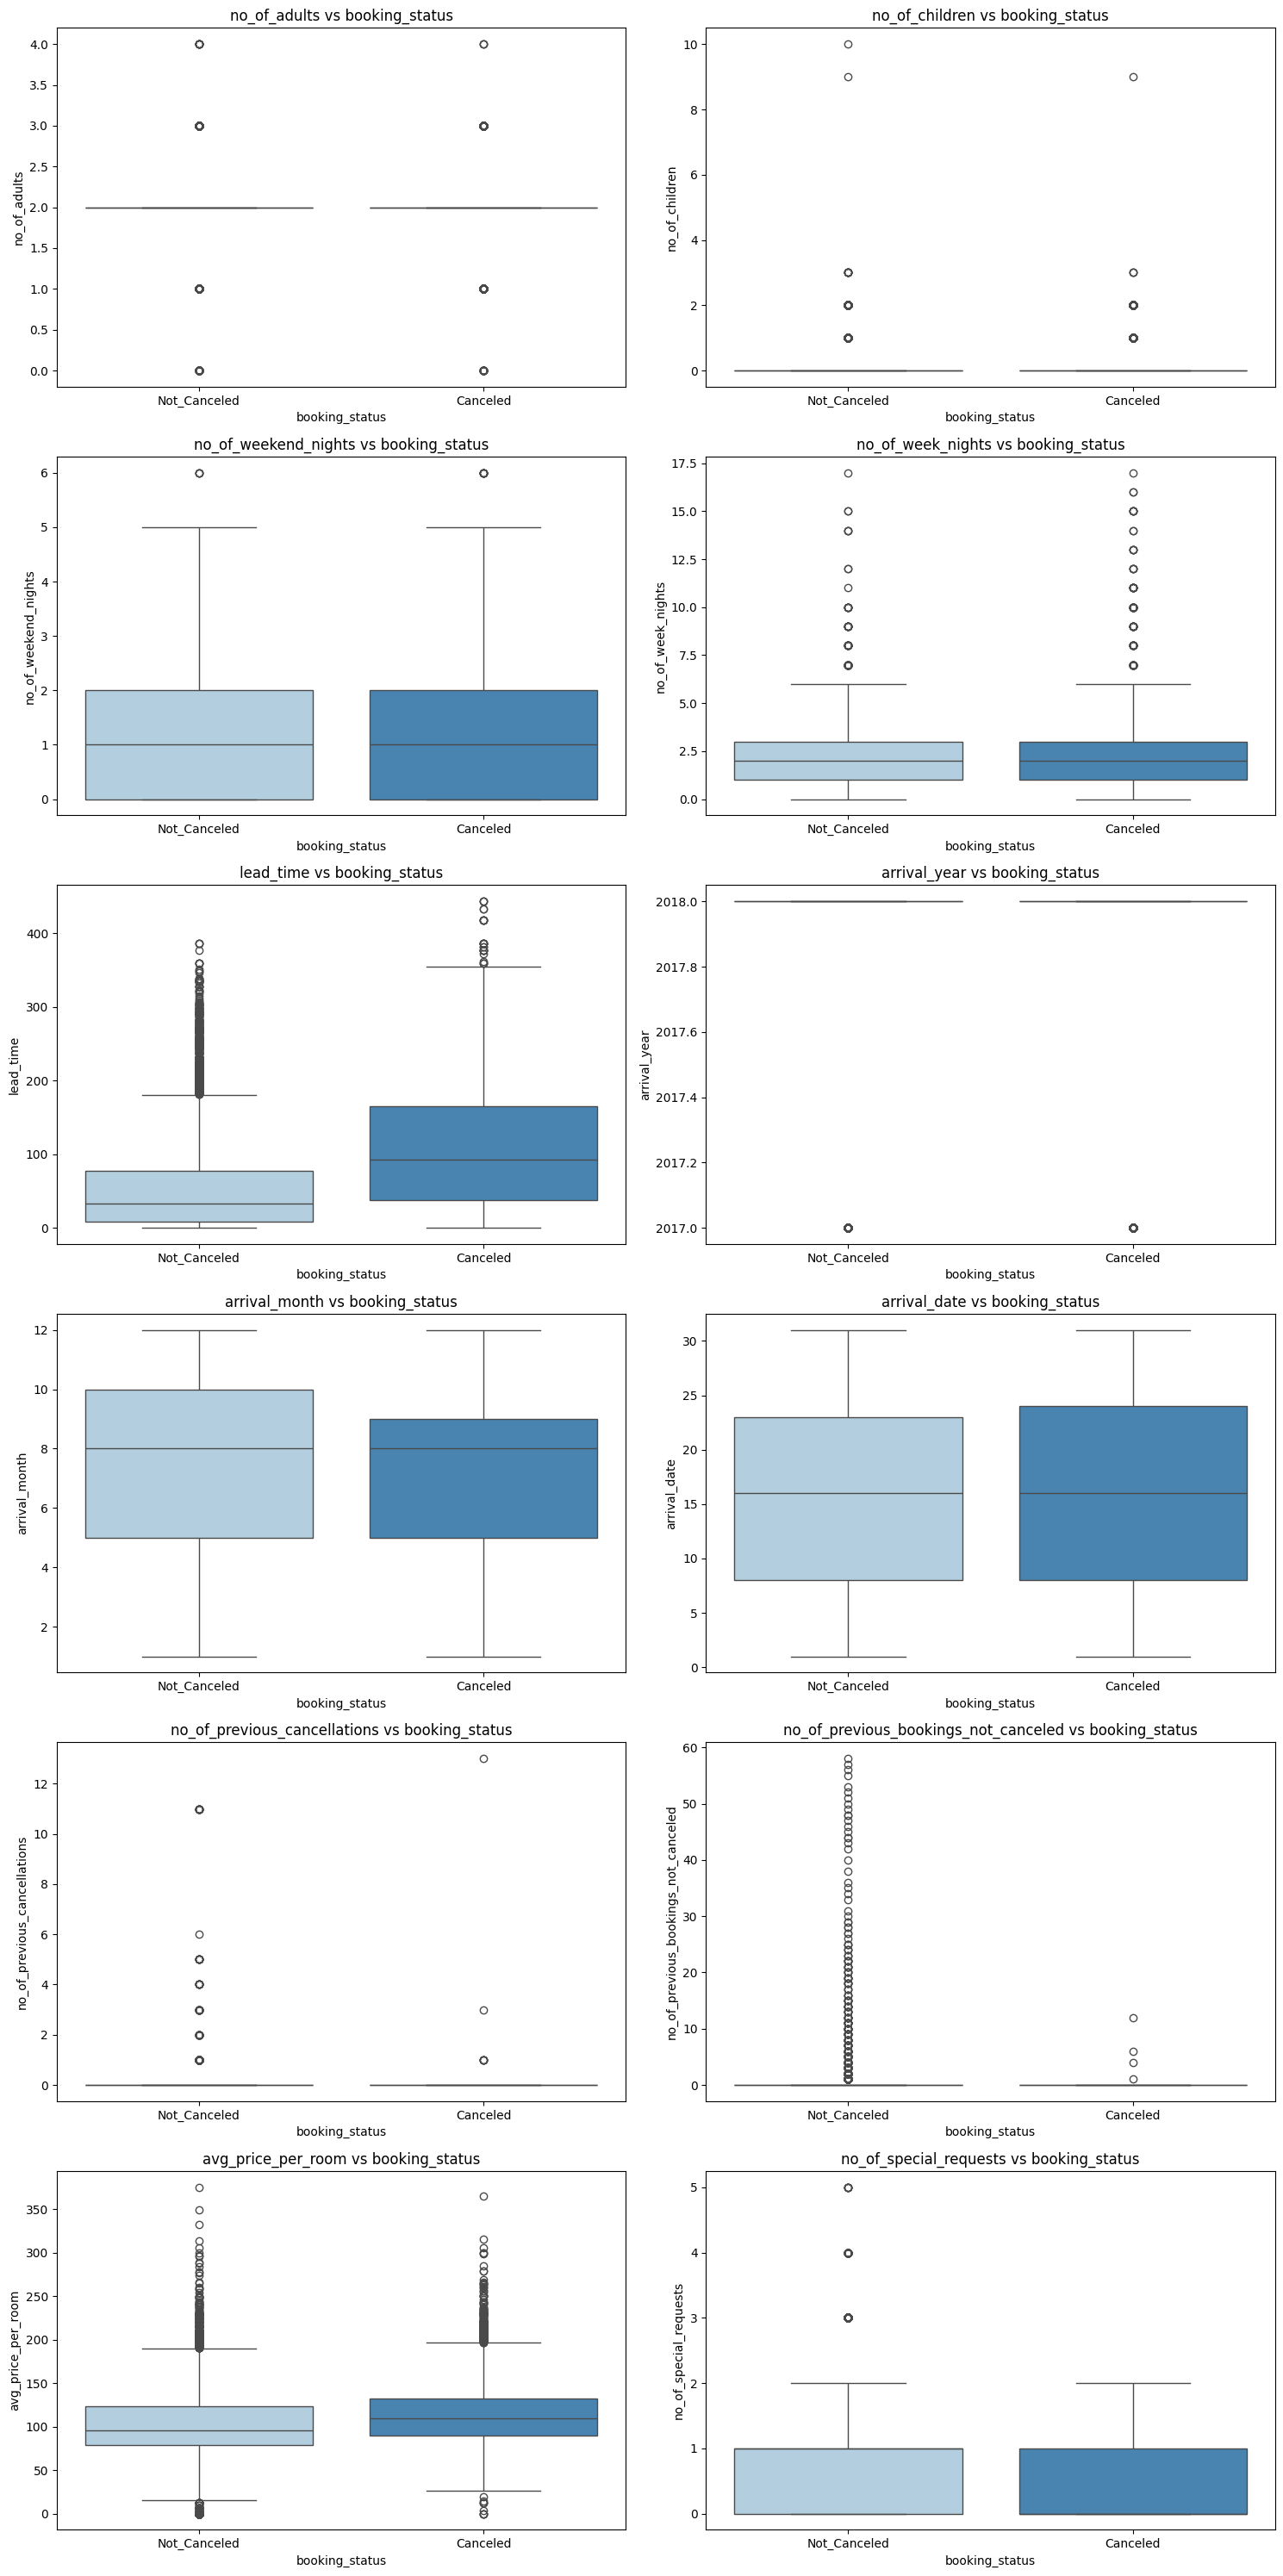

In [34]:
plot_bivariate_num(data, 'booking_status', num_cols)

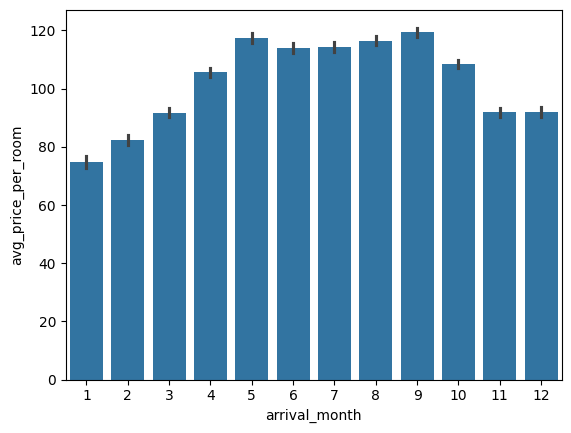

In [35]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()


In [36]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette=['#1f77b4', '#ff7f0e'], ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

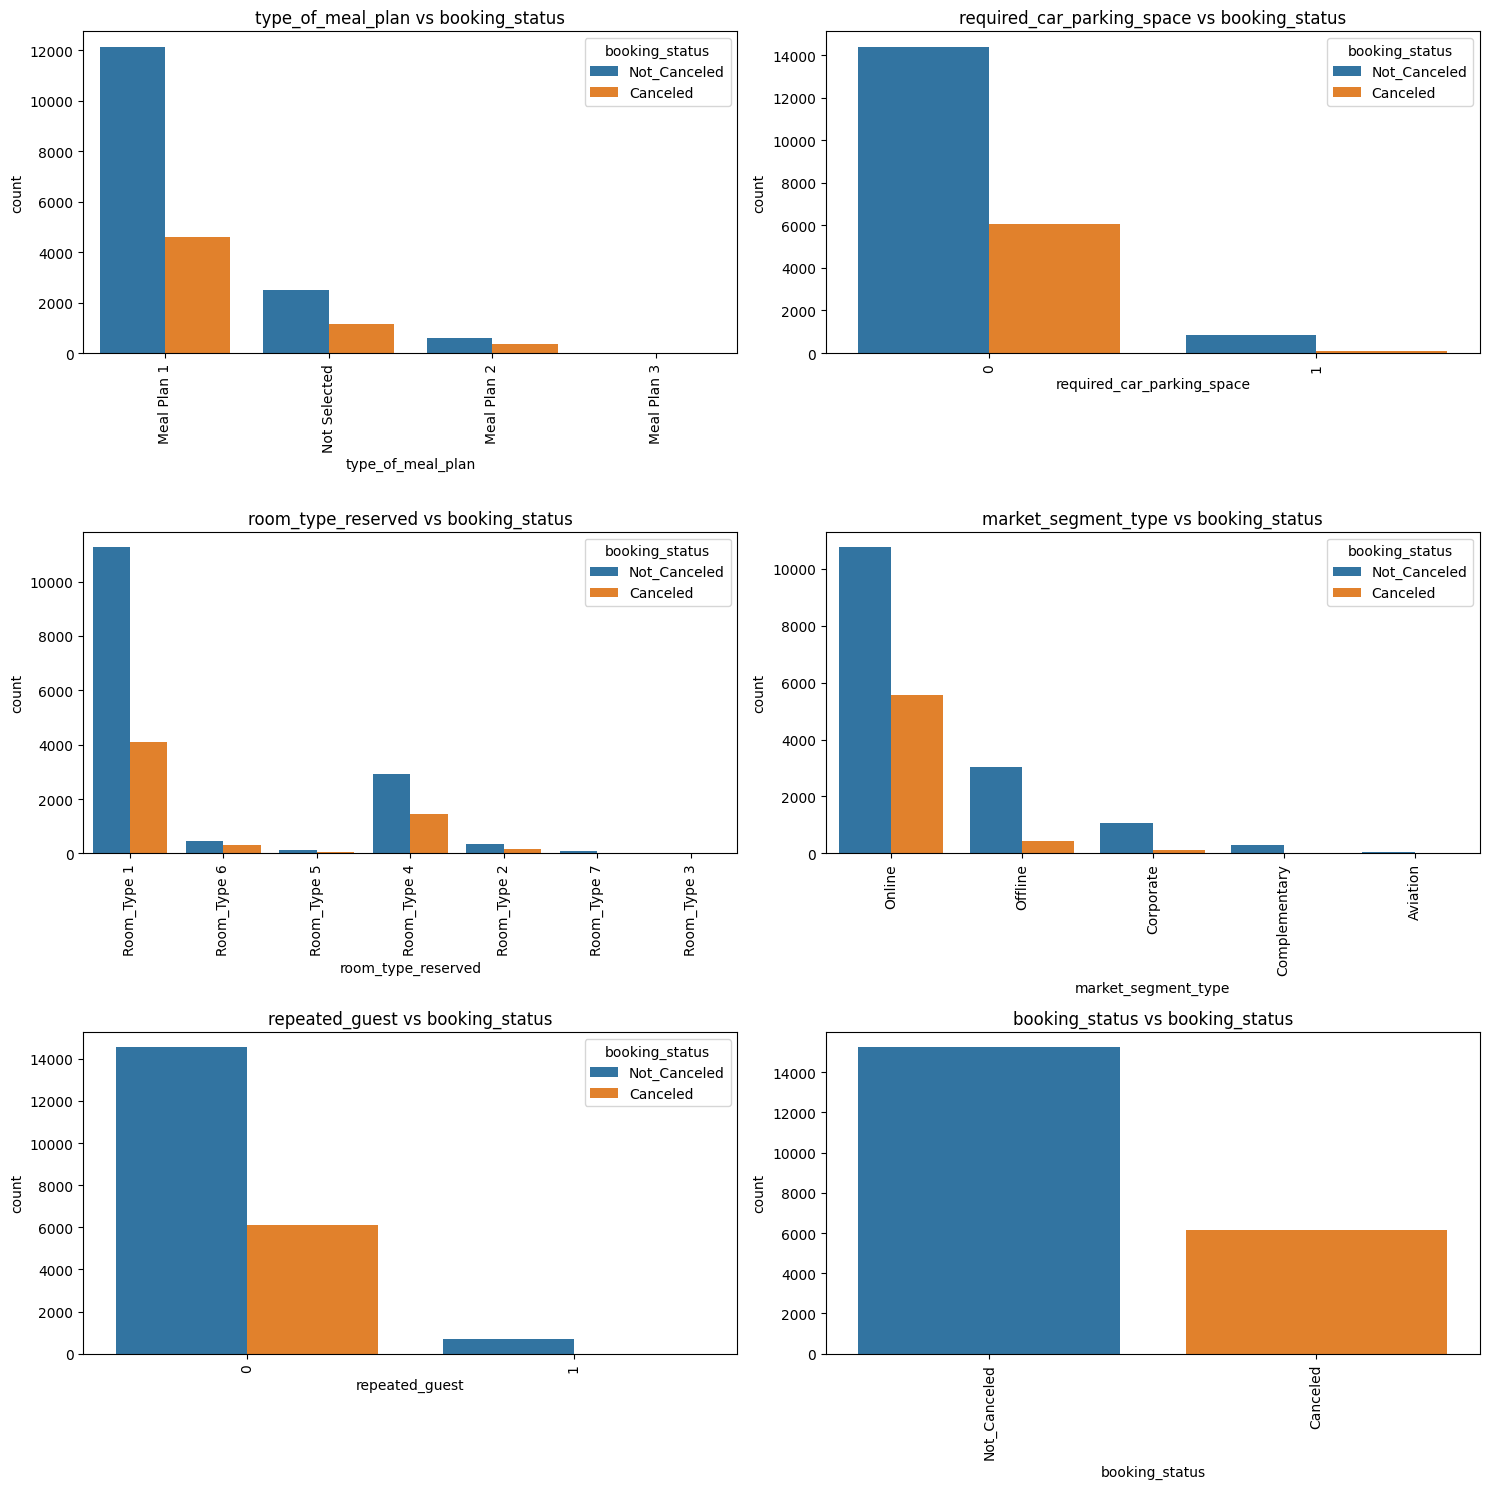

In [37]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

### Data Processing

In [38]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### label encoding for object type data

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()

mappings = {}

for column in cat_cols:
      df[column] = label_encoder.fit_transform(df[column])
      mappings[column] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
      

In [42]:
for label, code in mappings.items():
    print(f"{label}: {code}")

type_of_meal_plan: {'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}
required_car_parking_space: {0: 0, 1: 1}
room_type_reserved: {'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}
market_segment_type: {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}
repeated_guest: {0: 0, 1: 1}
booking_status: {'Canceled': 0, 'Not_Canceled': 1}


In [43]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### multicoliniarity check input1 <==> input2
!pip install statsmodels

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [48]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

##### above 5 is multicolinear
##### our data dont have

In [49]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### make corelation matrix for dataset

In [50]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

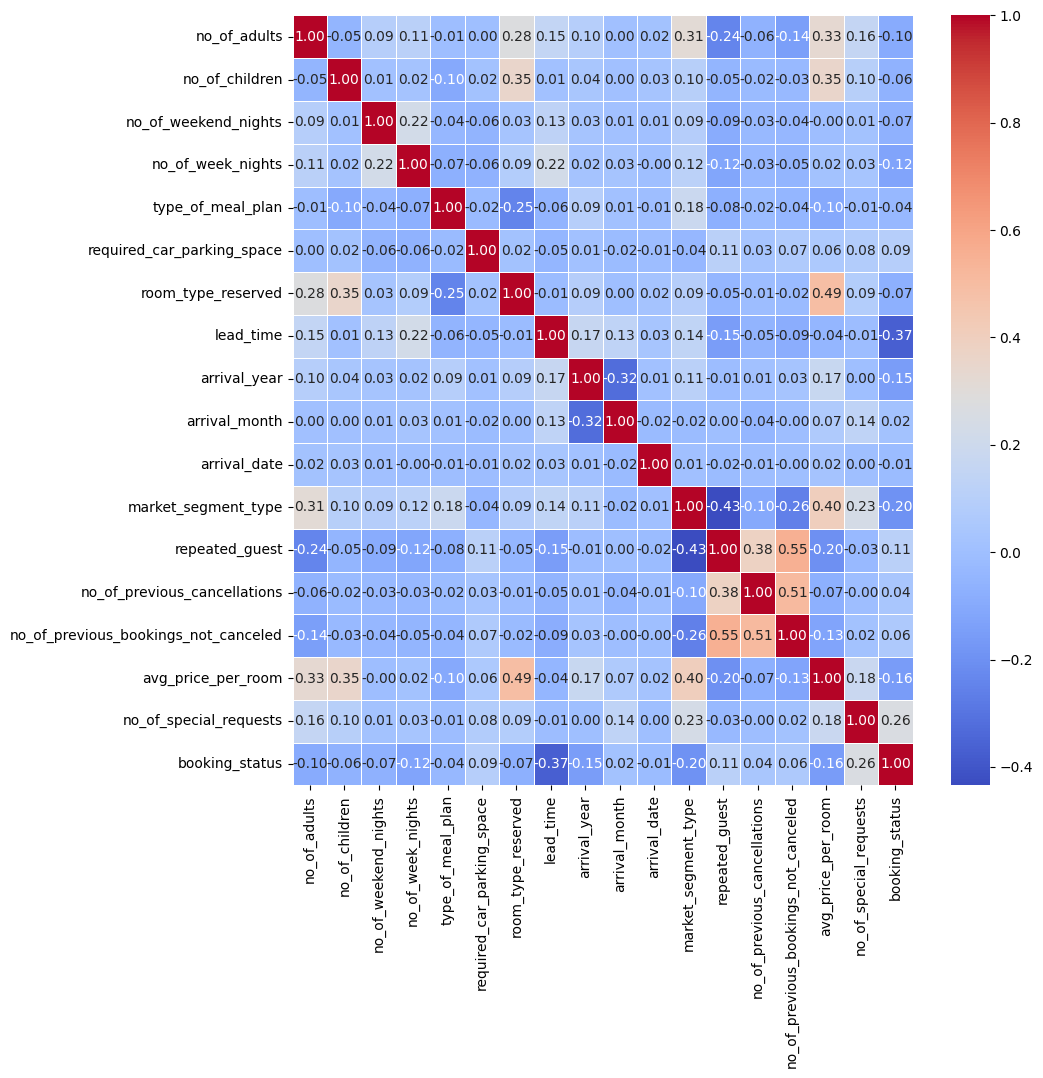

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#### skewnesss ?

In [52]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

#### log transformation

In [53]:
for column in df.columns:
    if skewness[column] > 5:
        df[column] = np.log1p(df[column])
        

In [54]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

#### handle imbalance data from visualizations

In [55]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

#### oversampling to reduce risk of data losses slit data in x and y

In [56]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [ ]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

#### this library has smote technique


In [57]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE(random_state=42)

In [60]:
X_res, y_res = smote.fit_resample(X, y)

In [61]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [62]:
df.shape

(21359, 18)

In [63]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [64]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [65]:
balanced_df.shape

(30462, 18)

In [66]:
df = balanced_df.copy()

In [67]:
df.shape

(30462, 18)

#### feature Selection

In [68]:
len(df.columns)

18

### random forest feature selection technique

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [72]:
Feature_importance = model.feature_importances_

In [73]:
Feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'Importance': Feature_importance
})

In [74]:
top_feature_importance_df = Feature_importance_df.sort_values(by='Importance', ascending=False)

In [75]:
len(df.columns)

18

#### select top 10 features

In [76]:
top_ten_features = top_feature_importance_df['feature'].head(10).tolist()

In [77]:
top_ten_df = df[top_ten_features + ['booking_status']]

In [78]:
top_ten_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [79]:
top_ten_df.columns

Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [80]:
df = top_ten_df.copy()

#### model selection

In [81]:
!pip install xgboost lightgbm 

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [83]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
classifiers = {
      "Random Forest": RandomForestClassifier(random_state=42),
      "Logistic Regression": LogisticRegression(random_state=42),
      "Gradient Boosting": GradientBoostingClassifier(random_state=42),
      "Support Vector Classifier": SVC(random_state=42),
      "Decision Tree": DecisionTreeClassifier(random_state=42),
      "KNN": KNeighborsClassifier(),
      "Naive Bayes": GaussianNB(),
      "XGBoost": XGBClassifier(random_state=42),
      "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
      "LGBM Classifier": LGBMClassifier(random_state=42)
}

In [86]:
matrix ={
      "Models": [],
      "Accuracy": [],
      "precision": [],
      "recall": [],
      "f1_score": [],
}

In [87]:
for model_name, classifier in classifiers.items():

      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      
      matrix["Models"].append(model_name)
      matrix["Accuracy"].append(accuracy)
      matrix["precision"].append(precision)
      matrix["recall"].append(recall)
      matrix["f1_score"].append(f1)
      
      

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [88]:
matrix_df = pd.DataFrame(matrix)
matrix_df

,Models,Accuracy,precision,recall,f1_score
0,Random Forest,0.891351,0.893721,0.890228,0.891971
1,Logistic Regression,0.786969,0.804677,0.762215,0.782871
2,Gradient Boosting,0.838175,0.819632,0.870358,0.844234
3,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.836534,0.845667,0.826384,0.835914
5,KNN,0.779255,0.856258,0.675244,0.755054
6,Naive Bayes,0.773182,0.803161,0.728339,0.763922
7,XGBoost,0.874610,0.870978,0.881759,0.876335
8,AdaBoostClassifier,0.804530,0.801025,0.814332,0.807624
9,LGBM Classifier,0.866076,0.851309,0.889577,0.870022


### do hyperparameter tuning & train model with random forest 

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [90]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [91]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
rf = RandomForestClassifier(random_state=42)

In [93]:
params_dist = {
      'n_estimators': randint(100, 500),
      'max_depth': randint(10, 50),
      'min_samples_split': randint(2, 10),
      'min_samples_leaf': randint(1, 5),
      'bootstrap': [True, False],
}

In [94]:
random_search = RandomizedSearchCV(
      estimator=rf,
      param_distributions=params_dist,
      n_iter=10,
      cv=5,
      verbose=1,
      random_state=42,
      scoring='accuracy',
)

In [95]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178E5AB7A70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017881E91580>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017881E9DA90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178DD280C80>},
                   random_state=42, scoring='accuracy', verbose=1)

In [96]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 234}

In [97]:
best_rf = random_search.best_estimator_

In [98]:
y_pred = best_rf.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [100]:
accuracy

0.8467725388813657

In [101]:
precision

0.8310157907141174

In [102]:
recall

0.8698297837348902

In [103]:
f1

0.8499799116110888

### save the model

In [104]:
import joblib

In [105]:
joblib.dump(best_rf, 'random_forest.pkl')

['random_forest.pkl']

In [106]:
loaded_model = joblib.load('random_forest.pkl')

In [107]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
1804,108,0,199.8,10,11,4,4,0,0,5


In [108]:
newdata = np.array([193,1,93.5,9,8,4,5,2,0,0]).reshape(1, -1)
newdata.shape


(1, 10)

In [109]:
loaded_model.predict(newdata)

array([1])